Import the libraries we will use

In [4]:
import numpy as np
import tensorflow as tf

Create some dummy data

In [5]:
scores=[3.0, 1.0, 0.2]

Define the softmax function (generalization of logistic)

$$\sigma(\mathbf{z})_j = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}}$$

In [6]:
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis=0)

In [12]:
softmax([.30,.10,.02])

array([ 0.38842275,  0.31801365,  0.2935636 ])

In [8]:
print softmax(scores)

[ 0.8360188   0.11314284  0.05083836]


In [16]:
print softmax([.3,.1,.02])

[ 0.38842275  0.31801365  0.2935636 ]


In [17]:
import matplotlib.pyplot as plt

In [49]:
f=100
x=np.arange(-2.0/f, 6.0/f, 0.1/f)
print x.shape

(80,)


In [50]:
scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)])

In [51]:
# help on vstack and ones_like
#help(np.vstack)
#help(np.ones_like)

# print shape of scores
print "size x",x.shape
print "size scores",scores.shape

print scores[1]

size x (80,)
size scores (3, 80)
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.]


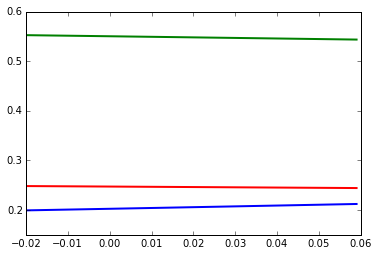

In [52]:
%matplotlib inline
plt.plot(x, softmax(scores).T, linewidth=2)
plt.show()

In [32]:
test=softmax(scores)

In [44]:
print test.shape

(3, 80)


In [57]:
print scores.shape

(3, 80)


In [53]:
def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat


In [105]:
test,label=loadDataSet()
print type(test)

<type 'list'>


In [107]:
print type(test)
print type(label)

<type 'list'>
<type 'list'>


In [61]:
def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

In [65]:
sigmoid(-90)

8.1940126239905147e-40

In [139]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt 
    dataMat,labelMat=loadDataSet() 
    
    # convert to array
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0] 
    
    # seperate class1 from class2
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
            
    # define a fig        
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    # plot a scatter of the two classes
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()


In [140]:
def gradAscent(dataMatIn, classLabels, maxCycles):
    dataMatrix = np.mat(dataMatIn)             #convert to NumPy matrix
    labelMat = np.mat(classLabels).transpose() #convert to NumPy matrix
    m,n = np.shape(dataMatrix)
    alpha = 0.001
    weights = np.ones((n,1))
    for k in range(maxCycles):              #heavy on matrix operations
        h = sigmoid(dataMatrix*weights)     #matrix mult
        error = (labelMat - h)              #vector subtraction
        weights = weights + alpha * dataMatrix.transpose()* error #matrix mult
    return weights


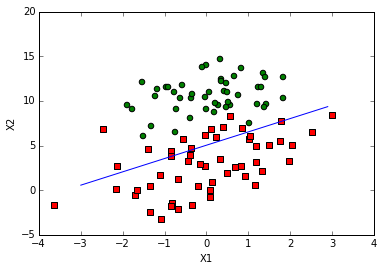

In [143]:
weights=gradAscent(test,label,50)
plotBestFit(weights.getA())

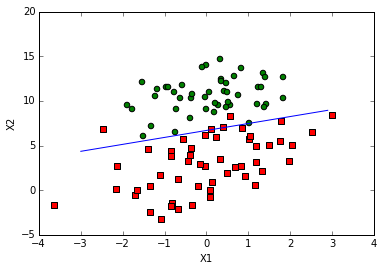

In [144]:
weights=gradAscent(test,label,500)
plotBestFit(weights.getA())

In [15]:
test=1000000000

for i in range(1000000):
    test=test+0.000001
    
test-1000000000

0.95367431640625

In [18]:
28*28*10+28*28

8624

In [25]:
test=np.zeros((100,100))
test.shape

(100, 100)

In [28]:
test2=test.reshape(10000)
test2.shape

(10000,)

In [29]:
help(test.reshape)

Help on built-in function reshape:

reshape(...)
    a.reshape(shape, order='C')
    
    Returns an array containing the same data with a new shape.
    
    Refer to `numpy.reshape` for full documentation.
    
    See Also
    --------
    numpy.reshape : equivalent function



In [36]:
# Initialize session
import tensorflow as tf
sess = tf.InteractiveSession()

# Some tensor we want to print the value of
a = tf.constant([1.0, 3.0])
print type(a)
# Add print operation
#a = tf.Print(a, [a], message="This is a: ")

b = a.eval()#tf.add(a, a).eval()
print type(b)
print(b)

<class 'tensorflow.python.framework.ops.Tensor'>
<type 'numpy.ndarray'>
[ 1.  3.]


Exception AssertionError: AssertionError() in <bound method InteractiveSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x7ffac1a50fd0>> ignored
